# Introduction

**Making sure you can run PyTorch code**

In our first practical session, we will learn the basics of how to train, test and use simple multilayered perceptron networks.

But first we need to verify that we are able to run pyTorch code. you can execute the code blocks as the one below by clicking shift+Enter


In [1]:
if 'google.colab' in str(get_ipython()):
  print('Running in Google colab, no need to install libraries')
else:
  print('Download the requirements.txt file from the course Web site in order to automatically install required libraries on a local machine via pip')

Running in Google colab, no need to install libraries


If you ran the above code snippet, you should see that you are either in google colab, or in some other environment.

In [2]:
import torch

print(f'pytorch version: {torch.__version__}')

num_gpu = torch.cuda.device_count()
print(f'{num_gpu} GPU available')

pytorch version: 2.2.1+cu121
1 GPU available


If the above code has printed 0 GPU available, please make sure you switched to the T4 GPU capable runtime (top right corner of the page), or else, the exercises will be very slow...

Once you are running a runtime with GPU, you can also run a shell command nvidia-smi, to check on the status of your GPU

In [3]:
!nvidia-smi


Fri Mar 22 13:46:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Example 1 - Simple linear regression task

Now that everything is up a running, let us check one of the simplest tasks, a neural network can perform - a linear regression. I.e. we will generate some data that will correspond to an approximate linear function and we will try to train a model that realizes this function.

First, let us generate some data.

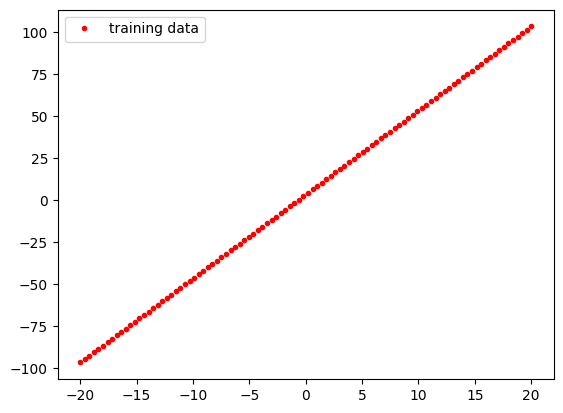

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Xs = np.linspace(-20,20,100) # we start with a hundered X values between -20 and 20

Ys=Xs*5+3.5 # as our Xs are a numpy array, we can perform simple arithmetic on each element of Xs

#Now, we can plot the data we generated

plt.plot(Xs,Ys,"r.",label="training data")
plt.legend()

Now we need to define the model. We will go with a very simple network, with one input, one output, and a hidden layer with 4 neurons.



In [5]:

import torch.nn as nn

#we set the parameters of our simple network architecture
N_input= 1 # one input
N_hidden=4 # 4  neurons in the hidden layer
N_output=1 # one output

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.Linear(N_hidden, N_output),
)

#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(Xs.reshape((100,1)), dtype=torch.float32)
targets = torch.tensor(Ys.reshape((100,1)), dtype=torch.float32)


Now that we have the data and the model, we need to specify the optimizer and a loss function. As this is a regression task, we will use the MSE (MeanSquareError) loss function and a simple SGD(stochastic gradient descent optimizer).

In [6]:
criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Stochastic Gradient Descent in this case)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) # lr is the learning rate


Finally, we need to set up the main training loop.

In [7]:
N_epochs=3000
loss_vals=[]
# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 100 == 0:
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


epoch:  0  loss:  3630.894775390625
epoch:  100  loss:  3.1588897705078125
epoch:  200  loss:  2.4566690921783447
epoch:  300  loss:  1.9031294584274292
epoch:  400  loss:  1.4686212539672852
epoch:  500  loss:  1.1290732622146606
epoch:  600  loss:  0.8649256229400635
epoch:  700  loss:  0.6603474617004395
epoch:  800  loss:  0.5025831460952759
epoch:  900  loss:  0.38141703605651855
epoch:  1000  loss:  0.28870630264282227
epoch:  1100  loss:  0.21801258623600006
epoch:  1200  loss:  0.16428132355213165
epoch:  1300  loss:  0.12355691194534302
epoch:  1400  loss:  0.09277225285768509
epoch:  1500  loss:  0.06955407559871674
epoch:  1600  loss:  0.05207833647727966
epoch:  1700  loss:  0.038948506116867065
epoch:  1800  loss:  0.029100045561790466
epoch:  1900  loss:  0.02172212116420269
epoch:  2000  loss:  0.01620195433497429
epoch:  2100  loss:  0.012077074497938156
epoch:  2200  loss:  0.008997035212814808
epoch:  2300  loss:  0.006698749028146267
epoch:  2400  loss:  0.0049858009

After training, we can also plot the evolution of the loss function value over the training period

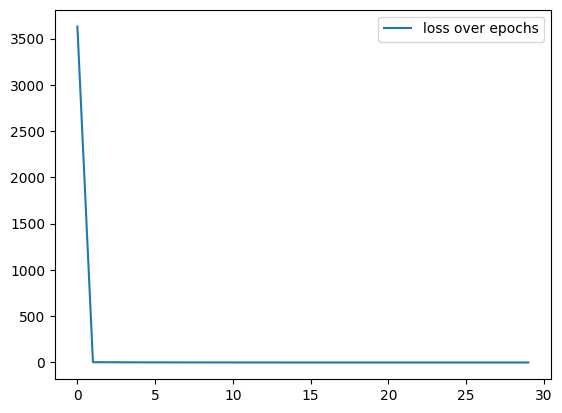

In [8]:
plt.plot(loss_vals,label="loss over epochs")
plt.legend()

As we can see, the first step is the most helpful, but actually, there is more happening than meets the eye in this plot, we just need to explore it in more detail by changing the y-axis range

(-0.5, 15.0)

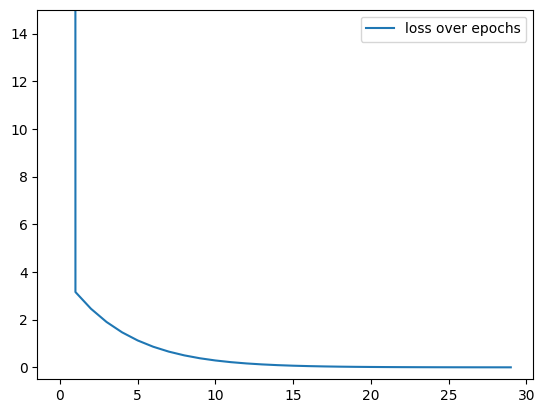

In [9]:
plt.plot(loss_vals,label="loss over epochs")
plt.legend()
plt.ylim(-.5,15)


Now that we have trained our model, we can see how it can be used on some new testing data. We will generate a few points inside the interval that the network was trained on and a few samples outside, to see if the network generalizes.

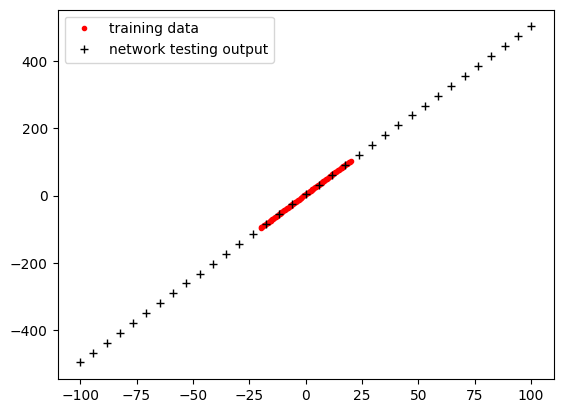

In [10]:
test_Xs= np.linspace(-100,100,35)
test_Ys=test_Xs*5+3.5

with torch.no_grad(): # turning off the autograd of PyTorch
    test_data = torch.tensor(test_Xs.reshape((35,1)), dtype=torch.float32)
    test_output = model(test_data)

#plot the results
plt.plot(Xs,Ys,"r.",label="training data")
plt.plot(test_Xs,test_output,"k+",label="network testing output")
plt.legend()

As we can see, the model is generalizing properly from the training data we have provided it with.


# Example 2 - non-linear function of 2 arguments

Now that we have the first working neural network model, we can move to something a little more realistic. A non-linear function of two arguments. Let's try with:

Y = x2 ** 2 * 5 - x1 * 3 + 15

torch.Size([2500, 2])

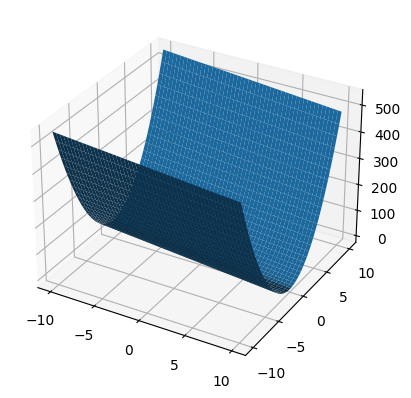

In [11]:
Xs1 = np.linspace(-10,10,50)
Xs2 = np.linspace(-10,10,50)

Xs1,Xs2 = np.meshgrid(Xs1,Xs2) # generate all possible pairs of x1 and x2

Ys = (Xs2**2*5)-(Xs1*3) + 15

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys, vmin=Ys.min() * 2)

#preparing torch tensors for learning

inputs = torch.tensor(np.concatenate((Xs1.reshape((2500,1)),Xs2.reshape((2500,1))),axis=1), dtype=torch.float32)
targets = torch.tensor(Ys.reshape((2500,1)), dtype=torch.float32)

inputs.shape
#targets.shape

This function is non-linear and has multiple arguments, let us create a model with non-linear activation function (We'll use ReLU for that), two hidden layers instead of one and we will use Adam optimizer to speed up the process.

In [12]:
#model definition
N_input=2
N_hidden=25
N_output=1

#we will now have more hidden layers and more neurons in each of them

model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),                       # we need non-linear activation functions
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
    nn.ReLU()
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate


Again, a very similar training loop, with just a bit more iterations:

In [13]:

N_epochs=50000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 2000 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


epoch:  0  loss:  59833.921875
epoch:  2000  loss:  14.901032447814941
epoch:  4000  loss:  6.015262126922607
epoch:  6000  loss:  5.188293933868408
epoch:  8000  loss:  4.521350383758545
epoch:  10000  loss:  3.35379958152771
epoch:  12000  loss:  3.1966893672943115
epoch:  14000  loss:  3.1324150562286377
epoch:  16000  loss:  3.1029090881347656
epoch:  18000  loss:  3.083991050720215
epoch:  20000  loss:  3.062419891357422
epoch:  22000  loss:  3.0425314903259277
epoch:  24000  loss:  3.0289478302001953
epoch:  26000  loss:  3.0117461681365967
epoch:  28000  loss:  2.9879679679870605
epoch:  30000  loss:  2.9672160148620605
epoch:  32000  loss:  2.9507601261138916
epoch:  34000  loss:  2.971404552459717
epoch:  36000  loss:  2.9209015369415283
epoch:  38000  loss:  2.905057191848755
epoch:  40000  loss:  2.890137195587158
epoch:  42000  loss:  2.8729357719421387
epoch:  44000  loss:  2.8564374446868896
epoch:  46000  loss:  2.987757682800293
epoch:  48000  loss:  2.8412415981292725


The optimizer learns very fast the first few steps and then slows down. Again we can plot the loss function improvement over *time*

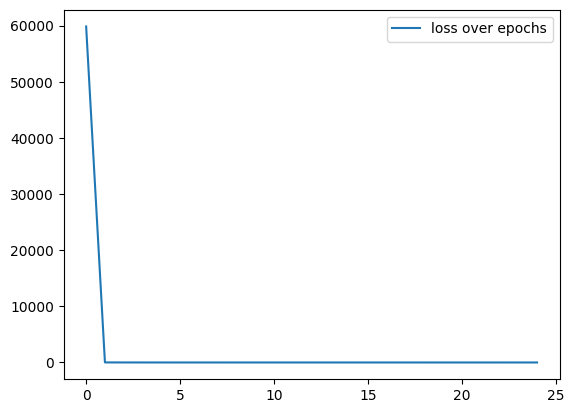

In [14]:
    plt.plot(range(len(loss_vals)),loss_vals,label="loss over epochs")
    plt.legend()

Again, we need to test if the function we have learned is generalizing beyond the training range:

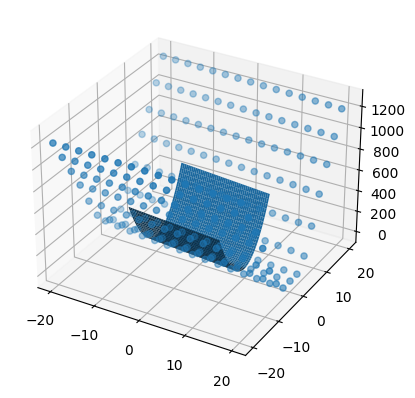

In [15]:
test_Xs1 = np.linspace(-20,20,15)
test_Xs2 = np.linspace(-20,20,15)

test_Xs1,test_Xs2 = np.meshgrid(test_Xs1,test_Xs2)

with torch.no_grad():
    test_data = torch.tensor(np.concatenate((test_Xs1.reshape((225,1)),test_Xs2.reshape((225,1))),axis=1), dtype=torch.float32)
    test_output = model(test_data)

test_mesh_output=test_output.reshape((15,15))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys,label="training data")
ax.scatter(test_Xs1,test_Xs2,test_mesh_output,label="testing data")



We have now seen two examples, where it was relatively easy for pytorch to fit the training data and generalize beyond it in the expected manner. Let us now see some situations, where this might not be so easy.

# Example 3 - XOR-like function


Let us first see how the underfitting looks like, based on the famous example of a non linear function similar to XOR. Let us consider a python function


```
def XOR_like(x1,x2):
    if (x1>=1 and x2<=1) or (x2>=1 and x1<=1):
        return 1
    else:
        return 0
```

Can we train a single perceptron to learn it? This time, we will use some random data points instead of the regular mesh.

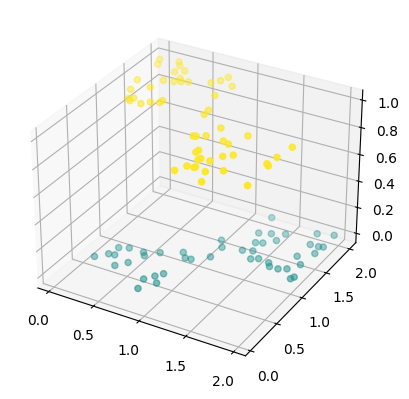

In [18]:
# let us start with some random X1,X2 point pairs from 0,2 interval
N_samples=100
train_X1s=np.random.rand(N_samples)*2
train_X2s=np.random.rand(N_samples)*2

def XOR_like(x1,x2):
    if (x1>=1 and x2<=1) or (x2>=1 and x1<=1):
        return 1
    else:
        return 0
train_Ys=np.array([XOR_like(x1,x2) for x1,x2 in zip(train_X1s,train_X2s)])

#prepare input and output data
inputs = torch.tensor(np.concatenate((train_X1s.reshape((N_samples,1)),train_X2s.reshape((N_samples,1))),axis=1), dtype=torch.float32)
targets = torch.tensor(train_Ys.reshape((N_samples,1)), dtype=torch.float32)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",vmin=-1,c=train_Ys) #data is colored by the Y value


As we have heard in the lecture, this function should be difficult for a simple 1-layer perceptron model. Let us test if this indeed is true. First we need to define the model:

In [19]:

#model definition
N_input=2
N_output=1

#This is the simplest network so far, just a simple perceptron

model = nn.Sequential(
    nn.Linear(N_input, N_output),
    nn.ReLU(),                       # we need non-linear activation functions
    )

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate


Once we have the model, we can try and train it:

In [20]:
N_epochs=5000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

epoch:  0  loss:  0.46173179149627686
epoch:  500  loss:  0.3031870126724243
epoch:  1000  loss:  0.25062915682792664
epoch:  1500  loss:  0.2354014813899994
epoch:  2000  loss:  0.23259545862674713
epoch:  2500  loss:  0.23232468962669373
epoch:  3000  loss:  0.23231342434883118
epoch:  3500  loss:  0.23231324553489685
epoch:  4000  loss:  0.23231323063373566
epoch:  4500  loss:  0.23231323063373566


The loss function gets lower, but never quite reaches 0. let us see if this is indeed a problem or not.

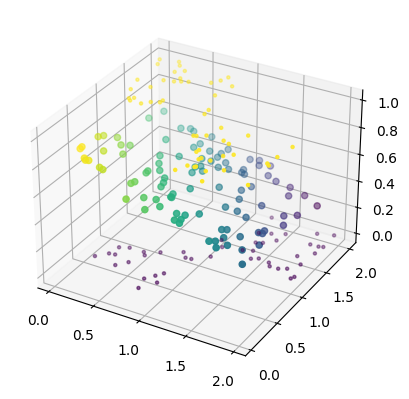

In [21]:
N_samples=100
test_X1s=np.random.rand(N_samples)*2
test_X2s=np.random.rand(N_samples)*2

test_Ys=np.array([XOR_like(x1,x2) for x1,x2 in zip(test_X1s,test_X2s)])

#prepare test input  data
test_inputs = torch.tensor(np.concatenate((test_X1s.reshape((N_samples,1)),test_X2s.reshape((N_samples,1))),axis=1), dtype=torch.float32)

with torch.no_grad():
    test_output = model(test_inputs)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
ax.scatter(test_X1s,test_X2s,test_output,label="testing data",c=test_output,marker="o")


We can see that the model is definitely not a good fit to the data.

Can we do better?
**Exercise 1**

Can you fill in the missing parts of the code so that we have a two-layer neural network that is able to fit the data?

epoch:  0  loss:  0.2807537019252777
epoch:  500  loss:  0.09390005469322205
epoch:  1000  loss:  0.08177928626537323
epoch:  1500  loss:  0.07321255654096603
epoch:  2000  loss:  0.06901875883340836
epoch:  2500  loss:  0.06766528636217117
epoch:  3000  loss:  0.06718451529741287
epoch:  3500  loss:  0.06690546870231628
epoch:  4000  loss:  0.0666220411658287
epoch:  4500  loss:  0.06616376340389252
epoch:  5000  loss:  0.06574990600347519
epoch:  5500  loss:  0.0653824433684349
epoch:  6000  loss:  0.06493173539638519
epoch:  6500  loss:  0.06474044919013977
epoch:  7000  loss:  0.06454379856586456
epoch:  7500  loss:  0.06448116898536682
epoch:  8000  loss:  0.06436052918434143
epoch:  8500  loss:  0.06434088945388794
epoch:  9000  loss:  0.06433864682912827
epoch:  9500  loss:  0.04567304626107216
epoch:  10000  loss:  0.04245477542281151
epoch:  10500  loss:  0.03548721224069595
epoch:  11000  loss:  0.03292910009622574
epoch:  11500  loss:  0.026441877707839012
epoch:  12000  los

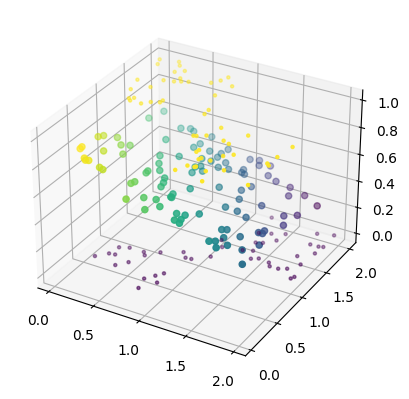

In [22]:

#model definition
N_input=2
N_hidden=20
N_output=1

#This is the simplest network so far, just a simple perceptron

model = nn.Sequential(
    nn.Linear(N_input, N_hidden),   # HERE WE NEED A NETWORK WITH A HIDDEN LAYER
    nn.ReLU(),  # AND A NON-LINEAR ACTIVATION - e.g. ReLU
    nn.Linear(N_hidden, N_output),
    )

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=15000
loss_vals=[]

 #HERE WE NEED TO PUT THE TRAINING/TESTING LOOP
# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    # perform a backward pass (backpropagation)
    loss.backward()
    # Update the parameters
    optimizer.step()


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
ax.scatter(test_X1s,test_X2s,test_output,label="testing data",c=test_output,marker="o")


# Example 4 - Overfitting by undersampling

Let us consider another common issue - overfitting caused by the training set not being representative of the larger testing set.

Let us consider A cosine function:

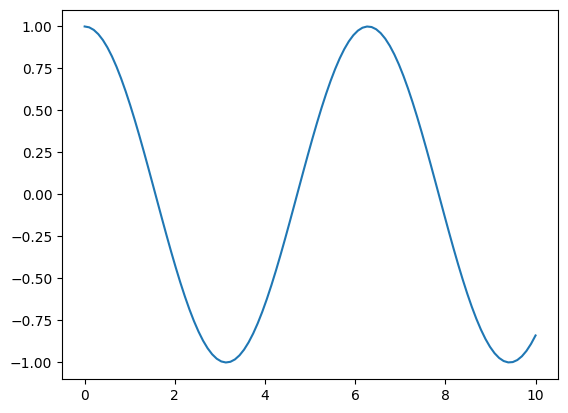

In [23]:
cos_Xs=np.linspace(0,10,100)
cos_Ys=np.cos(cos_Xs)
plt.plot(cos_Xs,cos_Ys)

If we prepare the training data from an interval that is too small, e.g. <0,3>

In [24]:
train_cos_Xs=np.random.rand(100)*3
train_cos_Ys=np.cos(train_cos_Xs)


#we set the parameters of our simple network architecture
N_input=1
N_hidden=15
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((100,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((100,1)), dtype=torch.float32)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

epoch:  0  loss:  0.4141300916671753
epoch:  500  loss:  0.0032115899957716465
epoch:  1000  loss:  0.0030331865418702364
epoch:  1500  loss:  0.003027248429134488
epoch:  2000  loss:  0.0030268782284110785
epoch:  2500  loss:  0.003026721067726612
epoch:  3000  loss:  0.0030266065150499344
epoch:  3500  loss:  0.0030264989472925663
epoch:  4000  loss:  0.003026410937309265
epoch:  4500  loss:  0.003026315476745367


The training seems to go well, but the function we have learned is notexactly a cosine function...

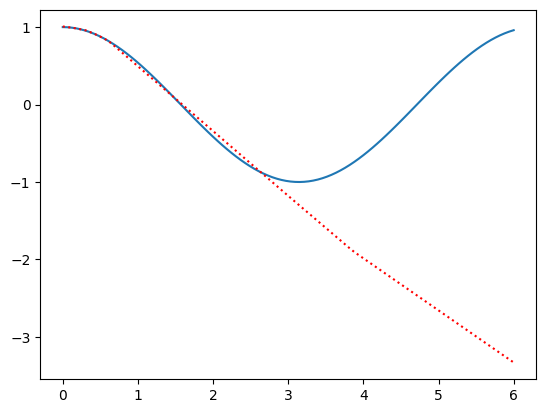

In [25]:
val_cos_Xs=np.linspace(0,6,100)
val_cos_Ys=np.cos(val_cos_Xs)
plt.plot(val_cos_Xs,val_cos_Ys)
val_inputs=torch.tensor(val_cos_Xs.reshape((100,1)), dtype=torch.float32)
with torch.no_grad():
    val_output = model(val_inputs)
plt.plot(val_cos_Xs,val_output,"r:")

Indeed, we have fitted the part of the cosine function from 0 to 3 fairly well, but then the cosine function behaves differently...

This is why we want to use a validation dataset to aid us in seeing the overfitting when it happens. Let us combine the two pieces of code together:


epoch:  0  loss:  0.6750425696372986 validation loss:  0.7280151844024658
epoch:  500  loss:  0.0012276328634470701 validation loss:  3.4898688793182373
epoch:  1000  loss:  0.0009532186668366194 validation loss:  3.376478433609009
epoch:  1500  loss:  0.0008486160659231246 validation loss:  3.3101065158843994
epoch:  2000  loss:  0.0007489994168281555 validation loss:  3.233809232711792
epoch:  2500  loss:  0.0006420473800972104 validation loss:  3.143641471862793
epoch:  3000  loss:  0.0005297479219734669 validation loss:  3.0383193492889404
epoch:  3500  loss:  0.000419546733610332 validation loss:  2.9192276000976562
epoch:  4000  loss:  0.0003194059827364981 validation loss:  2.7892136573791504
epoch:  4500  loss:  0.00023341603809967637 validation loss:  2.650036573410034


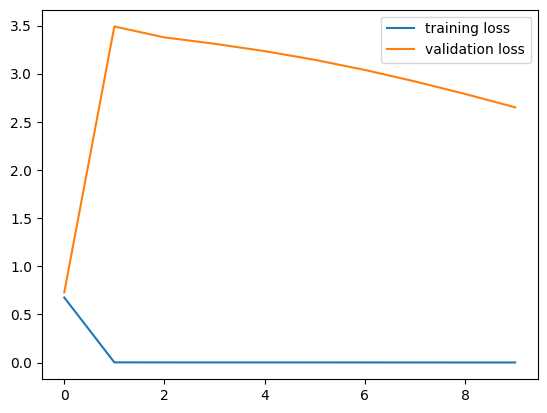

In [26]:
# we create the training data
train_cos_Xs=np.random.rand(200)*3
train_cos_Ys=np.cos(train_cos_Xs)

# and the validation data
val_cos_Xs=np.random.rand(30)*6
val_cos_Ys=np.cos(val_cos_Xs)


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((200,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((200,1)), dtype=torch.float32)
val_inputs=torch.tensor(val_cos_Xs.reshape((30,1)), dtype=torch.float32)
val_targets=torch.tensor(val_cos_Ys.reshape((30,1)), dtype=torch.float32)

#we set the parameters of our simple network architecture
N_input=1
N_hidden=25
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 500 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

#let us see the behavior of both training and validation loss
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

Clearly, while the training error seems to go down with training, but it is not the case for the validation error indicating that we have a severe overfitting issue.

**Exercise 2**

Can you modify the above code snippet, so that the model is fitting the data properly? Hint: we need to make sure that the training data is sampled from the range similar to the validation data...

* By changing the size of data

epoch:  0  loss:  1.1015971899032593 validation loss:  2.2967734336853027
epoch:  500  loss:  0.002422082470729947 validation loss:  1.698219895362854
epoch:  1000  loss:  0.00026538813835941255 validation loss:  1.8235671520233154
epoch:  1500  loss:  0.0001248209591722116 validation loss:  1.8547449111938477
epoch:  2000  loss:  0.00010377904254710302 validation loss:  1.858572244644165
epoch:  2500  loss:  9.167570533463731e-05 validation loss:  1.8535292148590088
epoch:  3000  loss:  8.297958265757188e-05 validation loss:  1.8429402112960815
epoch:  3500  loss:  7.244861626531929e-05 validation loss:  1.8290408849716187
epoch:  4000  loss:  6.41953811282292e-05 validation loss:  1.8092260360717773
epoch:  4500  loss:  5.6815861171344295e-05 validation loss:  1.781551718711853


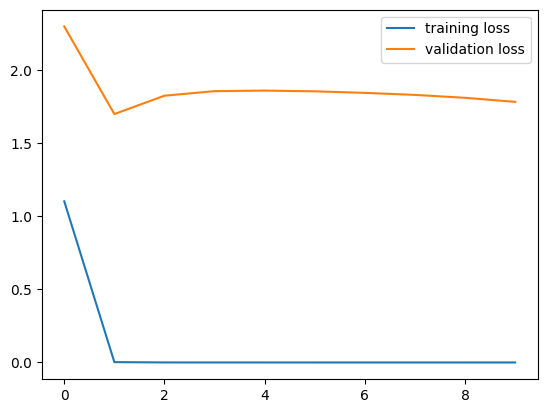

In [28]:
# we create the training data
train_cos_Xs=np.random.rand(200)*3
train_cos_Ys=np.cos(train_cos_Xs)

# and the validation data
# we should have the same size
val_cos_Xs=np.random.rand(200)*6
val_cos_Ys=np.cos(val_cos_Xs)


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((200,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((200,1)), dtype=torch.float32)
val_inputs=torch.tensor(val_cos_Xs.reshape((200,1)), dtype=torch.float32)
val_targets=torch.tensor(val_cos_Ys.reshape((200,1)), dtype=torch.float32)

#we set the parameters of our simple network architecture
N_input=1
N_hidden=25
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 500 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

#let us see the behavior of both training and validation loss
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

* By changing the values (make them somehow in the same range)

epoch:  0  loss:  0.7247824668884277 validation loss:  0.41650819778442383
epoch:  500  loss:  0.09169432520866394 validation loss:  0.10521028935909271
epoch:  1000  loss:  0.006510264705866575 validation loss:  0.0060391356237232685
epoch:  1500  loss:  0.003699476830661297 validation loss:  0.002180475741624832
epoch:  2000  loss:  0.0036448133178055286 validation loss:  0.00209358474239707
epoch:  2500  loss:  0.0036444258876144886 validation loss:  0.0020898969378322363
epoch:  3000  loss:  0.003644399344921112 validation loss:  0.0020898107904940844
epoch:  3500  loss:  0.0036443674471229315 validation loss:  0.0020896396599709988
epoch:  4000  loss:  0.0036443322896957397 validation loss:  0.0020896594505757093
epoch:  4500  loss:  0.003644288284704089 validation loss:  0.0020896021742373705


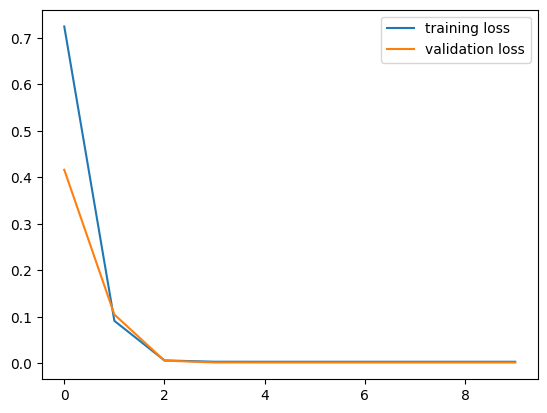

In [30]:
# we create the training data
train_cos_Xs=np.random.rand(200)*6
train_cos_Ys=np.cos(train_cos_Xs)

# and the validation data
val_cos_Xs=np.random.rand(30)*6
val_cos_Ys=np.cos(val_cos_Xs)


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((200,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((200,1)), dtype=torch.float32)
val_inputs=torch.tensor(val_cos_Xs.reshape((30,1)), dtype=torch.float32)
val_targets=torch.tensor(val_cos_Ys.reshape((30,1)), dtype=torch.float32)

#we set the parameters of our simple network architecture
N_input=1
N_hidden=25
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 500 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

#let us see the behavior of both training and validation loss
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

# Example 5 - overfitting noise with large capacity network

Let us consider a relatively simple function: y=x**2-5, but now add a little noise to the samples, and let us assume that the data is expensive to generate, so we will have relatively few datapoints.

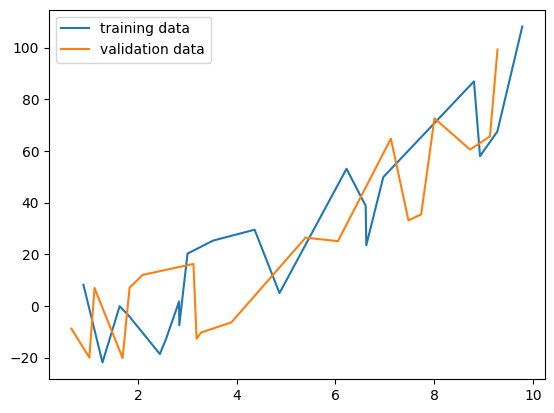

In [31]:
# we create the training data
train_noisy_Xs=np.random.rand(20)*10
train_noisy_Xs.sort()
train_noisy_Ys=train_noisy_Xs**2-5+np.random.rand(20)*40-20 #20 is the average of the noise


# and the validation data
val_noisy_Xs=np.random.rand(20)*10
val_noisy_Xs.sort()
val_noisy_Ys=val_noisy_Xs**2-5+np.random.rand(20)*40-20

#plot what is generated

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,label="validation data")
plt.legend()


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_noisy_Xs.reshape((20,1)), dtype=torch.float32)
targets = torch.tensor(train_noisy_Ys.reshape((20,1)), dtype=torch.float32)

val_inputs=torch.tensor(val_noisy_Xs.reshape((20,1)), dtype=torch.float32)
val_targets=torch.tensor(val_noisy_Ys.reshape((20,1)), dtype=torch.float32)


Now, since we have so few datapoints, we feel that we need to compensate for what we lack in the data department by having a more complex computational model. Let us for a moment accept that this might be a good idea...

In [32]:

#we set the parameters of our relatively complex network architecture
N_input=1
N_hidden=500
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=10000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 1000 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())


epoch:  0  loss:  1870.3089599609375 validation loss:  1365.984130859375
epoch:  1000  loss:  132.15719604492188 validation loss:  313.9779052734375
epoch:  2000  loss:  102.4808349609375 validation loss:  447.0279846191406
epoch:  3000  loss:  100.91549682617188 validation loss:  460.43914794921875
epoch:  4000  loss:  99.6949234008789 validation loss:  474.123779296875
epoch:  5000  loss:  98.7656021118164 validation loss:  485.29254150390625
epoch:  6000  loss:  97.72278594970703 validation loss:  482.297119140625
epoch:  7000  loss:  97.41166687011719 validation loss:  496.591796875
epoch:  8000  loss:  96.6904296875 validation loss:  497.0476989746094
epoch:  9000  loss:  96.22814178466797 validation loss:  493.14984130859375


Clearly, there is some overfitting going on, but is it a different kind of overfitting? Let us do some plotting:

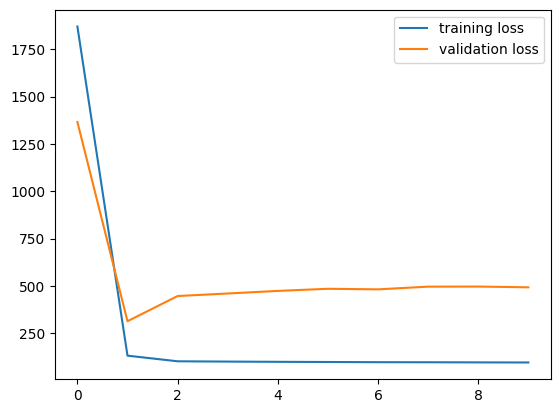

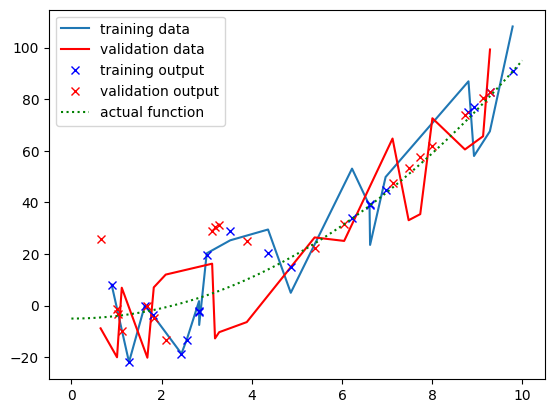

In [33]:
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

plt.figure()

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"r-",label="validation data")
plt.plot(inputs,y_pred.detach().numpy(),"bx",label="training output")
plt.plot(val_inputs,val_output.detach().numpy(),"rx",label="validation output")
actual_Xs=np.linspace(0,10,100)
plt.plot(actual_Xs,actual_Xs**2-5,"g:",label="actual function")
plt.legend()

Indeed, we have fitted the training data fairly well, but the presence of noise in the data (both training and validation), we can see that the model fits the blue curve better than we want it to (closer to the blue curve than to the green dots). It can be argued that this is indeed undersampling as well as in the previous example - we don't have enough data to generalize well.

In order tro fix that, we should have a relatively simpler model and train it on much more data.

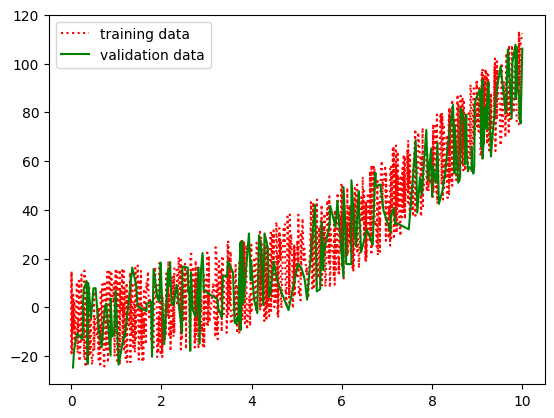

In [34]:
#let us createlarger training data
train_noisy_Xs=np.random.rand(1000)*10
train_noisy_Xs.sort()
train_noisy_Ys=train_noisy_Xs**2-5+np.random.rand(1000)*40-20 #20 is the average of the noise


# and the validation data
val_noisy_Xs=np.random.rand(200)*10
val_noisy_Xs.sort()
val_noisy_Ys=val_noisy_Xs**2-5+np.random.rand(200)*40-20

#plot what is generated

plt.plot(train_noisy_Xs,train_noisy_Ys,"r:",label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"g-",label="validation data")
plt.legend()


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_noisy_Xs.reshape((1000,1)), dtype=torch.float32)
targets = torch.tensor(train_noisy_Ys.reshape((1000,1)), dtype=torch.float32)

val_inputs=torch.tensor(val_noisy_Xs.reshape((200,1)), dtype=torch.float32)
val_targets=torch.tensor(val_noisy_Ys.reshape((200,1)), dtype=torch.float32)

**Exercise 3** can you now use this data to train a simpler network (just one hidden layer with 50 neurons on this data? Does it solve the problem?

Even though the Loss value remains non-zero throughout the training, this is expected, as there is now noise in the training and validation data. Nonetheless, the fit to the data is relatively good.  

* it can be said that the simpler network with one hidden layer and 50 neurons effectively solves the problem. However, if the performance is not satisfactory, you may need to adjust the architecture of the network, the optimization parameters, or explore other techniques such as regularization or different activation functions.

In [35]:

#we set the parameters of our relatively complex network architecture
N_input=1
N_hidden=50
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=10000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 1000 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())


epoch:  0  loss:  1864.711181640625 validation loss:  2090.90478515625
epoch:  1000  loss:  137.232177734375 validation loss:  147.63087463378906
epoch:  2000  loss:  136.101806640625 validation loss:  145.387451171875
epoch:  3000  loss:  135.90365600585938 validation loss:  145.27481079101562
epoch:  4000  loss:  135.81219482421875 validation loss:  144.9308624267578
epoch:  5000  loss:  135.73379516601562 validation loss:  144.91455078125
epoch:  6000  loss:  135.6283416748047 validation loss:  145.3511962890625
epoch:  7000  loss:  135.55067443847656 validation loss:  145.32347106933594
epoch:  8000  loss:  135.47763061523438 validation loss:  145.66014099121094
epoch:  9000  loss:  135.44454956054688 validation loss:  145.6181182861328


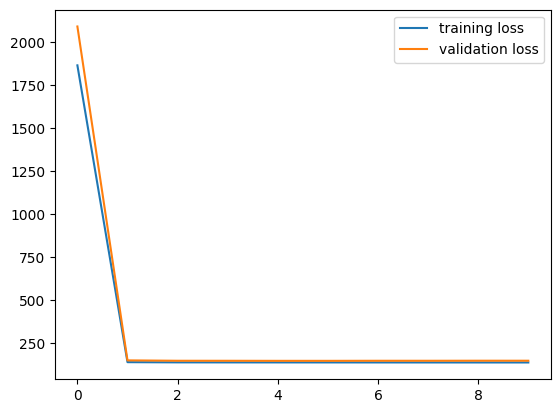

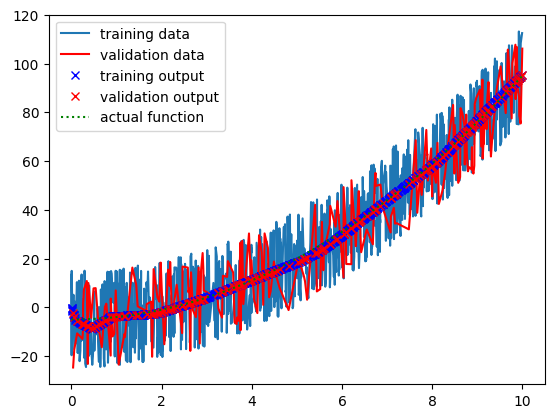

In [36]:
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

plt.figure()

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"r-",label="validation data")
plt.plot(inputs,y_pred.detach().numpy(),"bx",label="training output")
plt.plot(val_inputs,val_output.detach().numpy(),"rx",label="validation output")
actual_Xs=np.linspace(0,10,100)
plt.plot(actual_Xs,actual_Xs**2-5,"g:",label="actual function")
plt.legend()

# Assignments for homework

As different groups at different Universities will use different scoring criteria, this might be completely optional for some of you and compulsory for some of you. It might or might not contribute to your grade. **Please consult with your instructors**

Homework assignments:

1.   Please take a look at the [PyTorch beginner tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). We did not use the dataset and dataloader API, but this should not stop you. Choose one of the examples from today's lecture and extend it so that it uses datasets and dataloaders
2.   One more thing that you might want to consider is re-writing the training loops to use the dataloaders and minibatches as in the [pytorch tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)
